In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

raw = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\Model Train.csv', index_col=1)
raw

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
134,133,20,RL,NaN,6853,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,220000
291,290,60,RL,120.0,15611,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,233230
25,24,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
1094,1093,20,RL,71.0,9230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,146000
1289,1288,120,RL,40.0,5664,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,278000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,802,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
54,53,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
351,350,120,RL,68.0,7820,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318061


In [2]:
raw.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [110]:
processing = raw[['Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu','SalePrice']]
processing['LogPrice'] = np.log(processing['SalePrice'])
processing

C:\Users\BGCNHK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,SalePrice,LogPrice
Id,,,,,,,,,,,,,,,,,,,,,
134,GasA,Ex,Y,SBrkr,1296,0,0,1296,1,0,...,0,2,1,Gd,6,Typ,0,NaN,220000,12.301383
291,GasA,Ex,Y,SBrkr,1079,840,0,1919,0,0,...,1,3,1,Gd,8,Typ,1,Gd,233230,12.359780
25,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,...,0,3,1,Gd,6,Typ,1,TA,154000,11.944708
1094,GasA,Gd,Y,SBrkr,1200,0,0,1200,1,0,...,1,1,1,Gd,6,Typ,0,NaN,146000,11.891362
1289,GasA,Ex,Y,SBrkr,1659,0,0,1659,1,0,...,0,2,1,Ex,5,Typ,1,Ex,278000,12.535376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,GasA,Ex,Y,SBrkr,728,728,0,1456,1,0,...,1,3,1,Gd,7,Typ,1,Gd,189000,12.149502
54,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,...,1,0,1,Gd,5,Typ,1,Gd,385000,12.860999
351,GasA,Ex,Y,SBrkr,1869,0,0,1869,0,0,...,0,2,1,Ex,6,Typ,1,Gd,318061,12.669998


In [4]:
# processing.describe()
processing.isnull().sum()

Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     553
SalePrice         0
LogPrice          0
dtype: int64

In [111]:
processing['FireplaceQu'] = processing['FireplaceQu'].fillna('None')
processing['FireplaceQu']

C:\Users\BGCNHK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Id
134     None
291       Gd
25        TA
1094    None
1289      Ex
        ... 
803       Gd
54        Gd
351       Gd
80      None
793       TA
Name: FireplaceQu, Length: 1168, dtype: object

### Correlation Matrix: check which numeric var are correlated
1. TotRmsAbvGrd vs. GrLivArea, consider drop one
2. drop 1stFlrSF, 2ndFlrSF. they are collinear with GrLivArea (sum of floor 1 an 2)

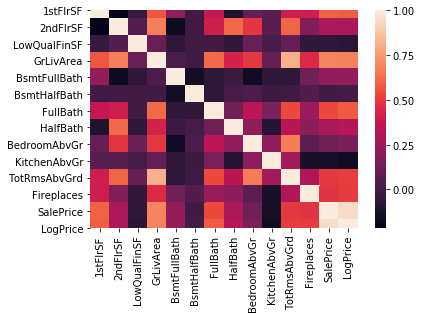

In [6]:
# plt.matshow(processing.corr())
# plt.show()
sns.heatmap(processing.corr()) #need to refresh after running commands in the following

In [7]:
processing.corr().style.background_gradient(cmap='coolwarm').set_precision(2) 
#need to refresh after running commands in the following

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,SalePrice,LogPrice
1stFlrSF,1,-0.21,-0.031,0.57,0.24,-0.0033,0.37,-0.11,0.1,0.07,0.4,0.41,0.6,0.59
2ndFlrSF,-0.21,1,0.05,0.67,-0.17,-0.0038,0.41,0.62,0.49,0.063,0.6,0.18,0.3,0.3
LowQualFinSF,-0.031,0.05,1,0.11,-0.054,-0.00088,-0.0051,-0.066,0.11,0.012,0.11,-0.054,-0.065,-0.072
GrLivArea,0.57,0.67,0.11,1,0.031,-0.0057,0.62,0.43,0.49,0.11,0.81,0.45,0.69,0.69
BsmtFullBath,0.24,-0.17,-0.054,0.031,1,-0.16,-0.066,-0.023,-0.16,-0.059,-0.065,0.14,0.23,0.24
BsmtHalfBath,-0.0033,-0.0038,-0.00088,-0.0057,-0.16,1,-0.059,0.0059,0.031,-0.023,-0.012,0.042,-0.0067,0.002
FullBath,0.37,0.41,-0.0051,0.62,-0.066,-0.059,1,0.13,0.35,0.17,0.54,0.25,0.54,0.58
HalfBath,-0.11,0.62,-0.066,0.43,-0.023,0.0059,0.13,1,0.22,-0.094,0.35,0.21,0.29,0.32
BedroomAbvGr,0.1,0.49,0.11,0.49,-0.16,0.031,0.35,0.22,1,0.23,0.67,0.079,0.13,0.17
KitchenAbvGr,0.07,0.063,0.012,0.11,-0.059,-0.023,0.17,-0.094,0.23,1,0.28,-0.14,-0.14,-0.16


In [8]:
processing.corr()['SalePrice'].sort_values(ascending=False)
#need to refresh after running commands in the following

SalePrice       1.000000
LogPrice        0.949896
GrLivArea       0.690946
1stFlrSF        0.597746
FullBath        0.538061
TotRmsAbvGrd    0.500043
Fireplaces      0.481185
2ndFlrSF        0.297925
HalfBath        0.294703
BsmtFullBath    0.233488
BedroomAbvGr    0.125537
BsmtHalfBath   -0.006746
LowQualFinSF   -0.065071
KitchenAbvGr   -0.143423
Name: SalePrice, dtype: float64

### 1stFlrSF:First Floor square feet
- drop this var as it's highly correlated with GrLivArea

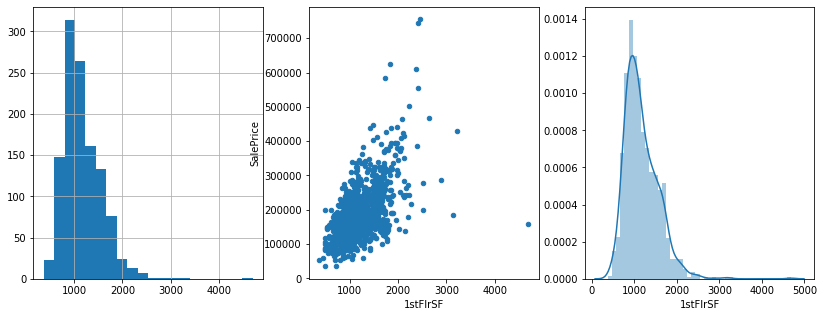

In [9]:
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])


processing['1stFlrSF'].hist(bins=20, ax=ax1)
# plt.hist(processing['2ndFlrSF'],ax=ax1), not working in side by side viz
# plt.scatter(processing['1stFlrSF'],processing['SalePrice'])
# plt.xlabel = ('Size')
# plt.ylabel = ('Price')
processing.plot.scatter(x='1stFlrSF', y='SalePrice', ax=ax2)
# sns.lmplot('1stFlrSF', 'SalePrice',processing )
sns.distplot(processing['1stFlrSF'], ax=ax3)

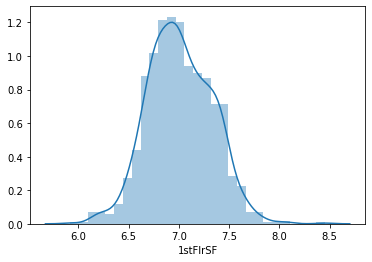

In [10]:
sns.distplot(np.log(processing['1stFlrSF']))
# ply.label = 
# plt.savefig('x')

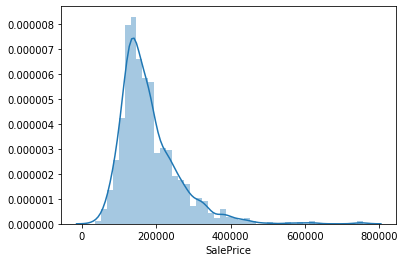

In [11]:
sns.distplot(processing['SalePrice'])

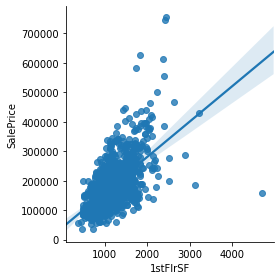

In [12]:
sns.lmplot('1stFlrSF', 'SalePrice',processing, height=4 )

### 2ndFlrSF:Second floor square feet
- 2nd floor with zero SF count: 664
- drop this var as it's higly correlated with GrLivArea 

True
2ndFlrSF    664
dtype: int64
2ndFlrSF    0.568493
dtype: float64


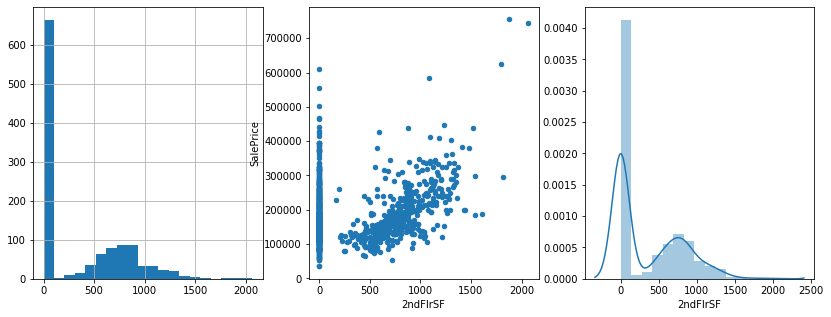

In [13]:
print(0 in processing['2ndFlrSF'].values)
print(processing[['2ndFlrSF']][processing['2ndFlrSF']==0].count())
print(processing[['2ndFlrSF']][processing['2ndFlrSF']==0].count()/processing['2ndFlrSF'].count())


fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['2ndFlrSF'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='2ndFlrSF', y='SalePrice', ax=ax2)
sns.distplot(processing['2ndFlrSF'])

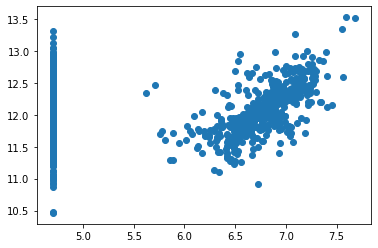

In [14]:
# processing.groupby(['2ndFlrSF']).count()
log_2ndfl = np.log(processing['2ndFlrSF']+110)
log_2ndfl
# processing.plot.scatter(x='log_2ndfl', y='SalePrice')
plt.scatter(log_2ndfl, np.log(processing['SalePrice']))
# from sklearn.preprocessing import power_transform
# power_transform(processing['2ndFlrSF'], method='box-cox')

2ndFlrSF    504
dtype: int64


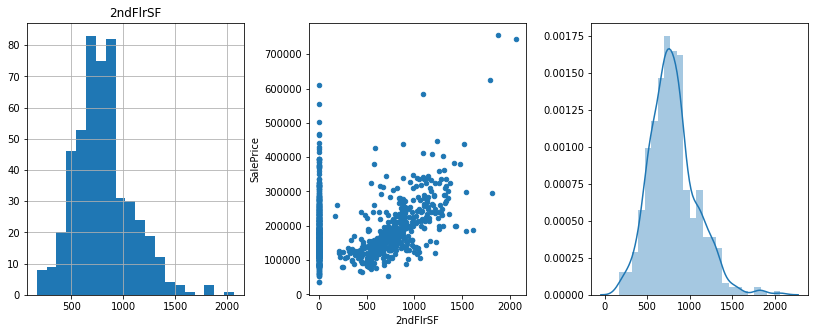

In [15]:
print(processing[['2ndFlrSF']][processing['2ndFlrSF']!=0].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing[['2ndFlrSF']][processing['2ndFlrSF']!=0].hist(bins=20, ax=ax1)
processing.plot.scatter(x='2ndFlrSF', y='SalePrice', ax=ax2) #need to remove 0!!!!
sns.distplot(processing[['2ndFlrSF']][processing['2ndFlrSF']!=0])

### GrLivArea: Above grade (ground) living area square feet
- sum of 1st and 2nd floor vars

False
GrLivArea    0
dtype: int64
GrLivArea    0.0
dtype: float64


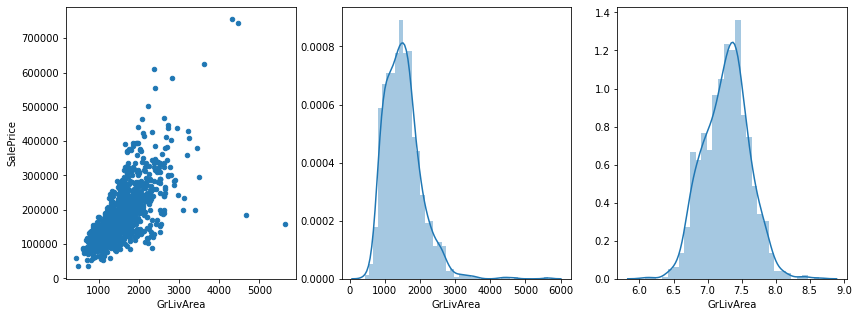

In [16]:
print( 0 in processing['GrLivArea'].values)
print(processing[['GrLivArea']][processing['GrLivArea']==0].count())
print(processing[['GrLivArea']][processing['GrLivArea']==0].count()/processing['GrLivArea'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax1)
sns.distplot(processing['GrLivArea'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.distplot(np.log(processing['GrLivArea']), ax=ax3)

### Tranform GrLivArea - Standardization

In [112]:
from sklearn import preprocessing
# GrLivArea_train = processing[['GrLivArea']]
# print(GrLivArea_train)
scaler = preprocessing.StandardScaler().fit(processing[['GrLivArea']])
print(scaler)
print(scaler.mean_)
print(scaler.scale_)
processing['GrLivArea_tranform'] = scaler.transform(processing[['GrLivArea']])
processing

StandardScaler(copy=True, with_mean=True, with_std=True)
[1521.01113014]
[525.03926048]


C:\Users\BGCNHK\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,SalePrice,LogPrice,GrLivArea_tranform
Id,,,,,,,,,,,,,,,,,,,,,
134,GasA,Ex,Y,SBrkr,1296,0,0,1296,1,0,...,2,1,Gd,6,Typ,0,None,220000,12.301383,-0.428561
291,GasA,Ex,Y,SBrkr,1079,840,0,1919,0,0,...,3,1,Gd,8,Typ,1,Gd,233230,12.359780,0.758017
25,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,...,3,1,Gd,6,Typ,1,TA,154000,11.944708,-0.878051
1094,GasA,Gd,Y,SBrkr,1200,0,0,1200,1,0,...,1,1,Gd,6,Typ,0,None,146000,11.891362,-0.611404
1289,GasA,Ex,Y,SBrkr,1659,0,0,1659,1,0,...,2,1,Ex,5,Typ,1,Ex,278000,12.535376,0.262816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,GasA,Ex,Y,SBrkr,728,728,0,1456,1,0,...,3,1,Gd,7,Typ,1,Gd,189000,12.149502,-0.123821
54,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,...,0,1,Gd,5,Typ,1,Gd,385000,12.860999,0.611362
351,GasA,Ex,Y,SBrkr,1869,0,0,1869,0,0,...,2,1,Ex,6,Typ,1,Gd,318061,12.669998,0.662786


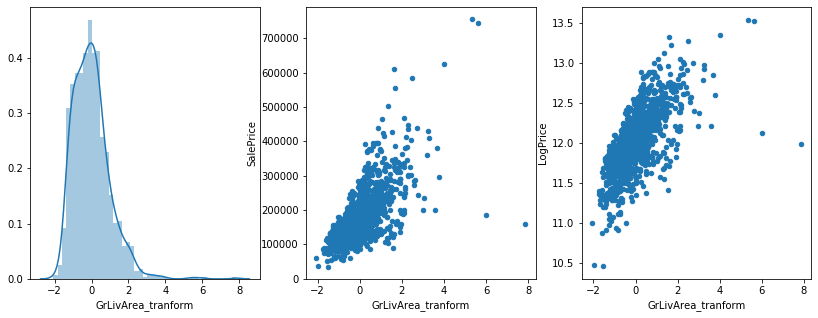

In [113]:
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

sns.distplot(processing['GrLivArea_tranform'], ax=ax1)
processing.plot.scatter(x='GrLivArea_tranform', y='SalePrice', ax=ax2)
processing.plot.scatter(x='GrLivArea_tranform', y='LogPrice', ax=ax3)

### LowQualFinSF:Low quality finished square feet (all floors)
- drop this var as there's no variance

True
LowQualFinSF    1145
dtype: int64
LowQualFinSF    0.980308
dtype: float64


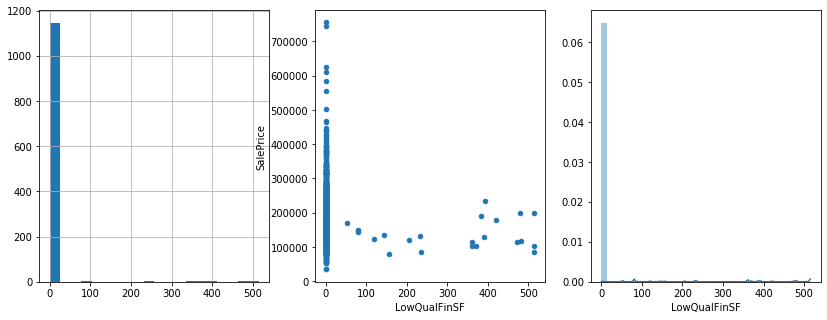

In [19]:
print(0 in processing['LowQualFinSF'].values)
print(processing[['LowQualFinSF']][processing['LowQualFinSF']==0].count())
print(processing[['LowQualFinSF']][processing['LowQualFinSF']==0].count()/processing['LowQualFinSF'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['LowQualFinSF'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='LowQualFinSF', y='SalePrice', ax=ax2)
sns.distplot(processing['LowQualFinSF'])

### BsmtFullBath: Basement full bathrooms
- correlation with price is pretty low: 0.23
- need to combine with bsmt half bath
- after combination, correlation with price is 0.22

True
value is 0: BsmtFullBath    671
dtype: int64
value 0 ratio: BsmtFullBath    0.574486
dtype: float64


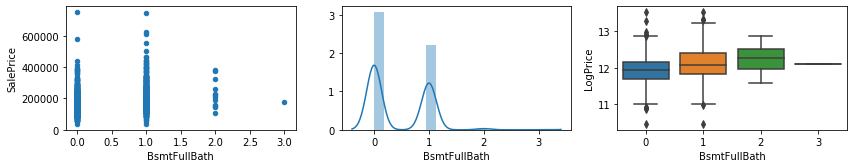

In [20]:
print( 0 in processing['BsmtFullBath'].values)
print('value is 0:', processing[['BsmtFullBath']][processing['BsmtFullBath']==0].count())
print('value 0 ratio:', processing[['BsmtFullBath']][processing['BsmtFullBath']==0].count()/processing['BsmtFullBath'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='BsmtFullBath', y='SalePrice', ax=ax1)
sns.distplot(processing['BsmtFullBath'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.boxplot(x='BsmtFullBath', y='LogPrice', data=processing)

### BsmtHalfBath: Basement half bathrooms
- correlation with price is pretty low: -0.0067
- need to combine with bsmt full bath
- after combination, correlation with price is 0.22

True
value is 0: BsmtHalfBath    1102
dtype: int64
value 0 ratio: BsmtHalfBath    0.943493
dtype: float64


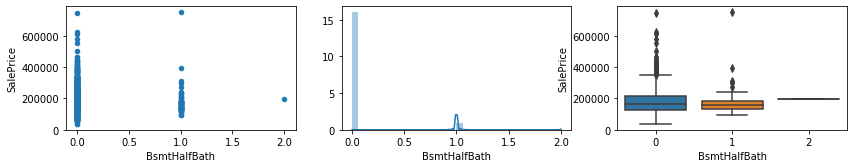

In [21]:
print( 0 in processing['BsmtHalfBath'].values)
print('value is 0:', processing[['BsmtHalfBath']][processing['BsmtHalfBath']==0].count())
print('value 0 ratio:', processing[['BsmtHalfBath']][processing['BsmtHalfBath']==0].count()/processing['BsmtHalfBath'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='BsmtHalfBath', y='SalePrice', ax=ax1)
sns.distplot(processing['BsmtHalfBath'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.boxplot(x='BsmtHalfBath', y='SalePrice', data=processing)

### FullBath: Full bathrooms above grade
- correlation with price is 0.54
- need to combine with half bath
- after combination, correlation with price is 0.56

True
value is 0: FullBath    7
dtype: int64
value 0 ratio: FullBath    0.005993
dtype: float64


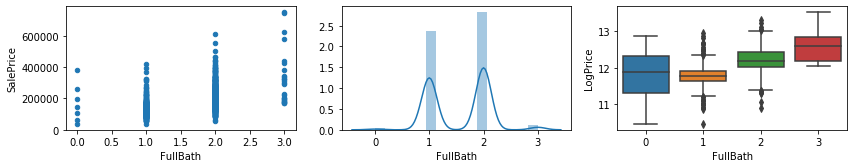

In [22]:
print( 0 in processing['FullBath'].values)
print('value is 0:', processing[['FullBath']][processing['FullBath']==0].count())
print('value 0 ratio:', processing[['FullBath']][processing['FullBath']==0].count()/processing['FullBath'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='FullBath', y='SalePrice', ax=ax1)
sns.distplot(processing['FullBath'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.boxplot(x='FullBath', y='LogPrice', data=processing)

### HalfBath: Half baths above grade
- correlation with price is 0.29
- need to combine with full bath
- after combination, correlation with price is 0.56

True
value is 0: HalfBath    737
dtype: int64
value 0 ratio: HalfBath    0.630993
dtype: float64


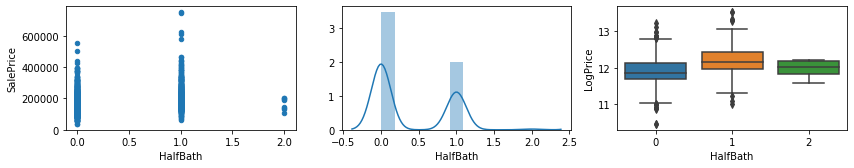

In [23]:
print( 0 in processing['HalfBath'].values)
print('value is 0:', processing[['HalfBath']][processing['HalfBath']==0].count())
print('value 0 ratio:', processing[['HalfBath']][processing['HalfBath']==0].count()/processing['HalfBath'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='HalfBath', y='SalePrice', ax=ax1)
sns.distplot(processing['HalfBath'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.boxplot(x='HalfBath', y='LogPrice', data=processing)

### Combine Bath for both basement and above ground

In [114]:
processing['CombinedBath_AbvGr'] = processing['FullBath']+processing['HalfBath']
processing['CombinedBath_Bsmt'] = processing['BsmtFullBath']+processing['BsmtHalfBath']
processing

C:\Users\BGCNHK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\BGCNHK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,SalePrice,LogPrice,GrLivArea_tranform,CombinedBath_AbvGr,CombinedBath_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,
134,GasA,Ex,Y,SBrkr,1296,0,0,1296,1,0,...,Gd,6,Typ,0,None,220000,12.301383,-0.428561,2,1
291,GasA,Ex,Y,SBrkr,1079,840,0,1919,0,0,...,Gd,8,Typ,1,Gd,233230,12.359780,0.758017,3,0
25,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,...,Gd,6,Typ,1,TA,154000,11.944708,-0.878051,1,1
1094,GasA,Gd,Y,SBrkr,1200,0,0,1200,1,0,...,Gd,6,Typ,0,None,146000,11.891362,-0.611404,2,1
1289,GasA,Ex,Y,SBrkr,1659,0,0,1659,1,0,...,Ex,5,Typ,1,Ex,278000,12.535376,0.262816,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,GasA,Ex,Y,SBrkr,728,728,0,1456,1,0,...,Gd,7,Typ,1,Gd,189000,12.149502,-0.123821,3,1
54,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,...,Gd,5,Typ,1,Gd,385000,12.860999,0.611362,1,2
351,GasA,Ex,Y,SBrkr,1869,0,0,1869,0,0,...,Ex,6,Typ,1,Gd,318061,12.669998,0.662786,2,0


In [115]:
print(processing['CombinedBath_AbvGr'].value_counts())
processing['CombinedBath_Bsmt'].value_counts()

2    495
1    376
3    278
4     17
0      2
Name: CombinedBath_AbvGr, dtype: int64


0    612
1    535
2     20
3      1
Name: CombinedBath_Bsmt, dtype: int64

In [116]:
# GrLivArea_train = processing[['GrLivArea']]
# print(GrLivArea_train)
min_max_scaler = preprocessing.MinMaxScaler()
preprocessing['CombinedBath_AbvGr']_minmax = min_max_scaler.fit_transform(preprocessing[['CombinedBath_AbvGr']])
preprocessing['CombinedBath_AbvGr']_minmax

# scaler = preprocessing.StandardScaler().fit(processing[['GrLivArea']])
# print(scaler)
# print(scaler.mean_)
# print(scaler.scale_)
# processing['GrLivArea_tranform'] = scaler.transform(processing[['GrLivArea']])
# processing


# >>> X_train = np.array([[ 1., -1.,  2.],
# ...                     [ 2.,  0.,  0.],
# ...                     [ 0.,  1., -1.]])
# ...
# >>> min_max_scaler = preprocessing.MinMaxScaler()
# >>> X_train_minmax = min_max_scaler.fit_transform(X_train)
# >>> X_train_minmax
# array([[0.5       , 0.        , 1.        ],
#        [1.        , 0.5       , 0.33333333],
#        [0.        , 1.        , 0.        ]])

SyntaxError: invalid syntax (<ipython-input-116-ad99631b88f2>, line 4)

### BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

True
value is 0: BedroomAbvGr    5
dtype: int64
value 0 ratio: BedroomAbvGr    0.004281
dtype: float64


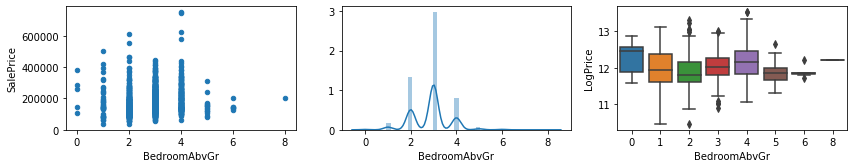

In [26]:
print( 0 in processing['BedroomAbvGr'].values)
print('value is 0:', processing[['BedroomAbvGr']][processing['BedroomAbvGr']==0].count())
print('value 0 ratio:', processing[['BedroomAbvGr']][processing['BedroomAbvGr']==0].count()/processing['BedroomAbvGr'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='BedroomAbvGr', y='SalePrice', ax=ax1)
sns.distplot(processing['BedroomAbvGr'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.boxplot(x='BedroomAbvGr', y='LogPrice', data=processing)

In [27]:
processing['BedroomAbvGr'].value_counts()

3    645
2    287
4    172
1     38
5     14
6      6
0      5
8      1
Name: BedroomAbvGr, dtype: int64

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

False
value is 0: TotRmsAbvGrd    0
dtype: int64
value 0 ratio: TotRmsAbvGrd    0.0
dtype: float64


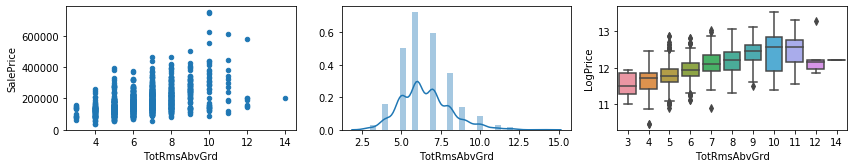

In [28]:
print( 0 in processing['TotRmsAbvGrd'].values)
print('value is 0:', processing[['TotRmsAbvGrd']][processing['TotRmsAbvGrd']==0].count())
print('value 0 ratio:', processing[['TotRmsAbvGrd']][processing['TotRmsAbvGrd']==0].count()/processing['TotRmsAbvGrd'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='TotRmsAbvGrd', y='SalePrice', ax=ax1)
sns.distplot(processing['TotRmsAbvGrd'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.boxplot(x='TotRmsAbvGrd', y='LogPrice', data=processing)

In [ ]:
# indices =x.map(lamda x: true if x in [] else False)
# raw.loc[indices,'var name']

In [108]:
print(processing['TotRmsAbvGrd'].value_counts())
processing['TotRmsAbvGrd'].value_counts()/processing['TotRmsAbvGrd'].count()

6     321
7     265
5     223
8     155
4      71
9      63
10     37
3      13
11     12
12      7
14      1
Name: TotRmsAbvGrd, dtype: int64


6     0.274829
7     0.226884
5     0.190925
8     0.132705
4     0.060788
9     0.053938
10    0.031678
3     0.011130
11    0.010274
12    0.005993
14    0.000856
Name: TotRmsAbvGrd, dtype: float64

### KitchenAbvGr: Kitchens above grade

False
value is 0: KitchenAbvGr    0
dtype: int64
value 0 ratio: KitchenAbvGr    0.0
dtype: float64


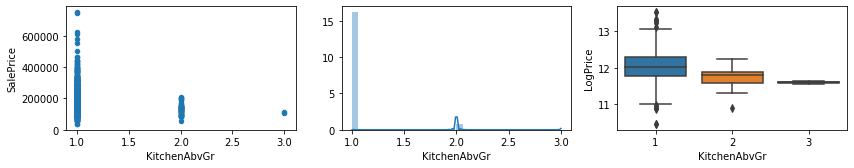

In [30]:
print( 0 in processing['KitchenAbvGr'].values)
print('value is 0:', processing[['KitchenAbvGr']][processing['KitchenAbvGr']==0].count())
print('value 0 ratio:', processing[['KitchenAbvGr']][processing['KitchenAbvGr']==0].count()/processing['KitchenAbvGr'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='KitchenAbvGr', y='SalePrice', ax=ax1)
sns.distplot(processing['KitchenAbvGr'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.boxplot(x='KitchenAbvGr', y='LogPrice', data=processing)

In [61]:
print(processing['KitchenAbvGr'].value_counts())
print(processing['KitchenAbvGr'].value_counts()/processing['KitchenAbvGr'].count())

1    1110
2      56
3       2
Name: KitchenAbvGr, dtype: int64
1    0.950342
2    0.047945
3    0.001712
Name: KitchenAbvGr, dtype: float64


In [65]:
processing['KitchenAbvGr'] = np.where(processing['KitchenAbvGr'] ==3,2,processing['KitchenAbvGr'])

C:\Users\BGCNHK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### KitchenAbvGr Dummification

In [67]:
drop_col = processing['KitchenAbvGr'].value_counts().index[0] # the most frequenct col
drop_col

KitchenAbvGr_ohe = OneHotEncoder(categories = 'auto', drop = [drop_col], sparse = False, handle_unknown='error')
KitchenAbvGr_enc = KitchenAbvGr_ohe.fit(processing[['KitchenAbvGr']])
KitchenAbvGr_enc = KitchenAbvGr_enc.transform(processing[['KitchenAbvGr']])
# print(KitchenAbvGr_enc)
KitchenAbvGr_enc = pd.DataFrame(KitchenAbvGr_enc, columns=KitchenAbvGr_ohe.get_feature_names(['KitchenAbvGr']))
# print(KitchenAbvGr_enc)
processing = pd.concat((processing.drop(['KitchenAbvGr'], axis=1).reset_index(drop = True), KitchenAbvGr_enc), axis = 1)
processing
# CentralAir_enc.transform( pd.DataFrame(Xtest[['RAD']].iloc[0,:] )) # for test

,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,SalePrice,LogPrice,KitchenAbvGr_2
0,GasA,Ex,Y,SBrkr,1296,0,0,1296,1,0,...,0,2,Gd,6,Typ,0,None,220000,12.301383,0.0
1,GasA,Ex,Y,SBrkr,1079,840,0,1919,0,0,...,1,3,Gd,8,Typ,1,Gd,233230,12.359780,0.0
2,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,...,0,3,Gd,6,Typ,1,TA,154000,11.944708,0.0
3,GasA,Gd,Y,SBrkr,1200,0,0,1200,1,0,...,1,1,Gd,6,Typ,0,None,146000,11.891362,0.0
4,GasA,Ex,Y,SBrkr,1659,0,0,1659,1,0,...,0,2,Ex,5,Typ,1,Ex,278000,12.535376,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,GasA,Ex,Y,SBrkr,728,728,0,1456,1,0,...,1,3,Gd,7,Typ,1,Gd,189000,12.149502,0.0
1164,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,...,1,0,Gd,5,Typ,1,Gd,385000,12.860999,0.0
1165,GasA,Ex,Y,SBrkr,1869,0,0,1869,0,0,...,0,2,Ex,6,Typ,1,Gd,318061,12.669998,0.0
1166,GasA,Gd,Y,SBrkr,682,548,0,1230,0,0,...,1,2,TA,5,Typ,0,None,110000,11.608236,0.0


### Fireplaces: Number of fireplaces

True
value is 0: Fireplaces    553
dtype: int64
value 0 ratio: Fireplaces    0.473459
dtype: float64


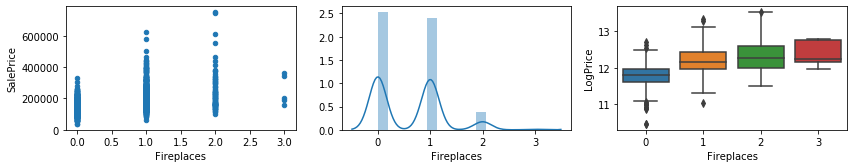

In [32]:
print( 0 in processing['Fireplaces'].values)
print('value is 0:', processing[['Fireplaces']][processing['Fireplaces']==0].count())
print('value 0 ratio:', processing[['Fireplaces']][processing['Fireplaces']==0].count()/processing['Fireplaces'].count())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

# processing['GrLivArea'].hist(bins=20, ax=ax1)
processing.plot.scatter(x='Fireplaces', y='SalePrice', ax=ax1)
sns.distplot(processing['Fireplaces'], ax=ax2)
# np.log(processing['GrLivArea']).hist(bins=20, ax=ax3)
sns.boxplot(x='Fireplaces', y='LogPrice', data=processing)

### Number of Fireplaces Dummification

In [71]:
print(processing['Fireplaces'].value_counts())
print(processing['Fireplaces'].value_counts()/processing['Fireplaces'].count())
processing['Fireplaces'] = np.where(processing['Fireplaces']==3,2,processing['Fireplaces'])

0    553
1    526
2     89
Name: Fireplaces, dtype: int64
0    0.473459
1    0.450342
2    0.076199
Name: Fireplaces, dtype: float64


In [72]:
drop_col = processing['Fireplaces'].value_counts().index[0] # the most frequenct col
drop_col

Fireplaces_ohe = OneHotEncoder(categories = 'auto', drop = [drop_col], sparse = False, handle_unknown='error')
Fireplaces_enc = Fireplaces_ohe.fit(processing[['Fireplaces']])
Fireplaces_enc = Fireplaces_enc.transform(processing[['Fireplaces']])
# print(Fireplaces_enc)
Fireplaces_enc = pd.DataFrame(Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']))
# print(Fireplaces_enc)
processing = pd.concat((processing.drop(['Fireplaces'], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1)
processing
# Fireplaces_enc.transform( pd.DataFrame(Xtest[['RAD']].iloc[0,:] )) # for test

,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,SalePrice,LogPrice,KitchenAbvGr_2,Fireplaces_1,Fireplaces_2
0,GasA,Ex,Y,SBrkr,1296,0,0,1296,1,0,...,2,Gd,6,Typ,None,220000,12.301383,0.0,0.0,0.0
1,GasA,Ex,Y,SBrkr,1079,840,0,1919,0,0,...,3,Gd,8,Typ,Gd,233230,12.359780,0.0,1.0,0.0
2,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,...,3,Gd,6,Typ,TA,154000,11.944708,0.0,1.0,0.0
3,GasA,Gd,Y,SBrkr,1200,0,0,1200,1,0,...,1,Gd,6,Typ,None,146000,11.891362,0.0,0.0,0.0
4,GasA,Ex,Y,SBrkr,1659,0,0,1659,1,0,...,2,Ex,5,Typ,Ex,278000,12.535376,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,GasA,Ex,Y,SBrkr,728,728,0,1456,1,0,...,3,Gd,7,Typ,Gd,189000,12.149502,0.0,1.0,0.0
1164,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,...,0,Gd,5,Typ,Gd,385000,12.860999,0.0,1.0,0.0
1165,GasA,Ex,Y,SBrkr,1869,0,0,1869,0,0,...,2,Ex,6,Typ,Gd,318061,12.669998,0.0,1.0,0.0
1166,GasA,Gd,Y,SBrkr,682,548,0,1230,0,0,...,2,TA,5,Typ,None,110000,11.608236,0.0,0.0,0.0


### Heating: Type of heating
- drop this var as there isn't any variance

0
GasA     0.976027
GasW     0.013699
Grav     0.004281
Wall     0.003425
OthW     0.001712
Floor    0.000856
Name: Heating, dtype: float64


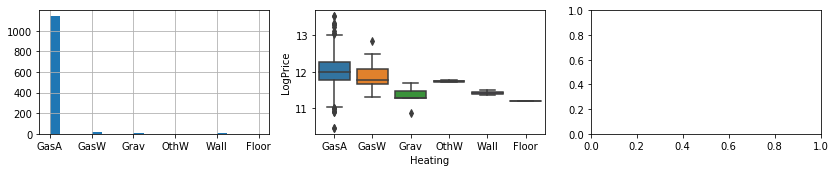

In [34]:
print(processing['Heating'].isnull().sum())
print(processing['Heating'].value_counts()/len(processing))

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['Heating'].hist(bins=20, ax=ax1)
sns.boxplot(x='Heating', y='LogPrice', data=processing, ax=ax2)

In [35]:
processing['Heating'].value_counts()

GasA     1140
GasW       16
Grav        5
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

### HeatingQC: Heating quality and condition - Nominal Var
- Ex: Excellent
- Gd: Good
- TA: Average/Typical
- Fa: Fair
- Po: Poor

0
Ex    0.505993
TA    0.295377
Gd    0.160959
Fa    0.036815
Po    0.000856
Name: HeatingQC, dtype: float64


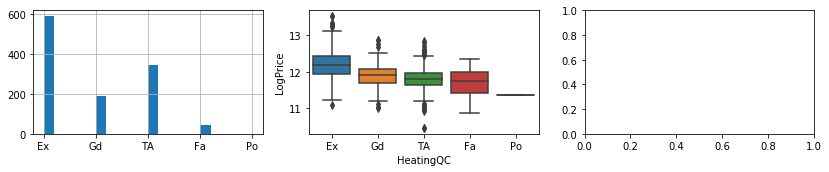

In [36]:
print(processing['HeatingQC'].isnull().sum())
print(processing['HeatingQC'].value_counts()/len(processing))

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['HeatingQC'].hist(bins=20, ax=ax1)
sns.boxplot(x='HeatingQC', y='LogPrice', data=processing, ax=ax2)

In [87]:
print(processing['HeatingQC'].value_counts())
processing['HeatingQC'].value_counts()/processing['HeatingQC'].count()
processing['HeatingQC'] = np.where(processing['HeatingQC']=='Po','Fa',processing['HeatingQC'])
processing['HeatingQC'] = processing['HeatingQC'].replace({'Ex':3, 'TA':1,'Gd':2,'Fa':0})

3    591
1    345
2    188
0     44
Name: HeatingQC, dtype: int64


### CentralAir: Central air conditioning
- Yes or No
- apply dummification

0


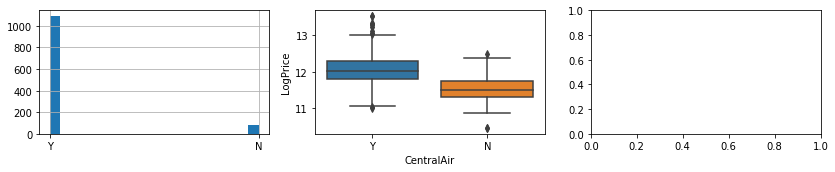

In [88]:
print(processing['CentralAir'].isnull().sum())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['CentralAir'].hist(bins=20, ax=ax1)
sns.boxplot(x='CentralAir', y='LogPrice', data=processing, ax=ax2)

In [89]:
print(processing['CentralAir'].value_counts())

drop_col = processing['CentralAir'].value_counts().index[0] # the most frequenct col
drop_col

Y    1089
N      79
Name: CentralAir, dtype: int64


'Y'

In [90]:
CentralAir_ohe = OneHotEncoder(categories = 'auto', drop = [drop_col], sparse = False, handle_unknown='error')
CentralAir_enc = CentralAir_ohe.fit(processing[['CentralAir']])
CentralAir_enc = CentralAir_enc.transform(processing[['CentralAir']])
print(CentralAir_enc)
CentralAir_enc = pd.DataFrame(CentralAir_enc, columns=CentralAir_ohe.get_feature_names(['CentralAir']))
print(CentralAir_enc)
processing = pd.concat((processing.drop(['CentralAir'], axis=1).reset_index(drop = True), CentralAir_enc), axis = 1)
processing
# CentralAir_enc.transform( pd.DataFrame(Xtest[['RAD']].iloc[0,:] )) # for test

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
      CentralAir_N
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
...            ...
1163           0.0
1164           0.0
1165           0.0
1166           0.0
1167           0.0

[1168 rows x 1 columns]


,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,SalePrice,LogPrice,KitchenAbvGr_2,Fireplaces_1,Fireplaces_2,CentralAir_N
0,GasA,3,SBrkr,1296,0,0,1296,1,0,2,...,Gd,6,Typ,None,220000,12.301383,0.0,0.0,0.0,0.0
1,GasA,3,SBrkr,1079,840,0,1919,0,0,2,...,Gd,8,Typ,Gd,233230,12.359780,0.0,1.0,0.0,0.0
2,GasA,3,SBrkr,1060,0,0,1060,1,0,1,...,Gd,6,Typ,TA,154000,11.944708,0.0,1.0,0.0,0.0
3,GasA,2,SBrkr,1200,0,0,1200,1,0,1,...,Gd,6,Typ,None,146000,11.891362,0.0,0.0,0.0,0.0
4,GasA,3,SBrkr,1659,0,0,1659,1,0,2,...,Ex,5,Typ,Ex,278000,12.535376,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,GasA,3,SBrkr,728,728,0,1456,1,0,2,...,Gd,7,Typ,Gd,189000,12.149502,0.0,1.0,0.0,0.0
1164,GasA,2,SBrkr,1842,0,0,1842,2,0,0,...,Gd,5,Typ,Gd,385000,12.860999,0.0,1.0,0.0,0.0
1165,GasA,3,SBrkr,1869,0,0,1869,0,0,2,...,Ex,6,Typ,Gd,318061,12.669998,0.0,1.0,0.0,0.0
1166,GasA,2,SBrkr,682,548,0,1230,0,0,1,...,TA,5,Typ,None,110000,11.608236,0.0,0.0,0.0,0.0


In [41]:
# CentralAir_ohe = OneHotEncoder(categories = 'auto', drop = [drop_col], sparse = False, handle_unknown='error')
# CentralAir_ohe

In [42]:
# CentralAir_enc = CentralAir_ohe.fit(processing[['CentralAir']])
# CentralAir_enc

In [43]:
# dummy_centralair = pd.get_dummies(processing['CentralAir'])
# dummy_centralair.columns = ['CtrAir_N', 'CtrAir_Y']
# dummy_centralair
# processing = pd.concat([processing,dummy_centralair],axis=1)
# processing

### Electrical: Electrical system
- SBrkr: Standard Circuit Breakers & Romex
- FuseA: Fuse Box over 60 AMP and all Romex wiring (Average)	
- FuseF: 60 AMP Fuse Box and mostly Romex wiring (Fair)
- FuseP: 60 AMP Fuse Box and mostly knob & tube wiring (poor)
- Mix: Mixed

1


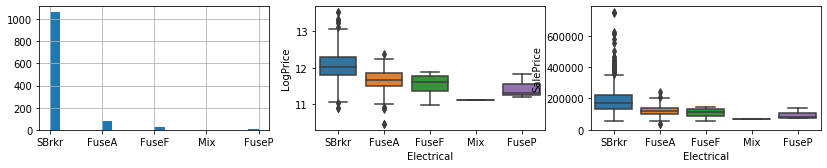

In [44]:
print(processing['Electrical'].isnull().sum())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['Electrical'].hist(bins=20, ax=ax1)
sns.boxplot(x='Electrical', y='LogPrice', data=processing, ax=ax2)
sns.boxplot(x='Electrical', y='SalePrice', data=processing, ax=ax3)

In [45]:
print(processing['Electrical'].value_counts())
print(processing['Electrical'].value_counts()/processing['Electrical'].count())

SBrkr    1063
FuseA      78
FuseF      22
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    0.910883
FuseA    0.066838
FuseF    0.018852
FuseP    0.002571
Mix      0.000857
Name: Electrical, dtype: float64


In [94]:
processing['Electrical'] = processing['Electrical'].fillna('SBrkr')
processing['Electrical'] = np.where(processing['Electrical']!= 'SBrkr','Other',processing['Electrical'])
print(processing['Electrical'].value_counts())

SBrkr    1064
Other     104
Name: Electrical, dtype: int64
SBrkr    1064
Other     104
Name: Electrical, dtype: int64


In [95]:
drop_col = processing['Electrical'].value_counts().index[0] # the most frequenct col
drop_col

Electrical_ohe = OneHotEncoder(categories = 'auto', drop = [drop_col], sparse = False, handle_unknown='error')
Electrical_enc = Electrical_ohe.fit(processing[['Electrical']])
Electrical_enc = Electrical_enc.transform(processing[['Electrical']])
# print(CentralAir_enc)
Electrical_enc = pd.DataFrame(Electrical_enc, columns=Electrical_ohe.get_feature_names(['Electrical']))
# print(Electrical_enc)
processing = pd.concat((processing.drop(['Electrical'], axis=1).reset_index(drop = True), Electrical_enc), axis = 1)
processing
# CentralAir_enc.transform( pd.DataFrame(Xtest[['RAD']].iloc[0,:] )) # for test


,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,TotRmsAbvGrd,Functional,FireplaceQu,SalePrice,LogPrice,KitchenAbvGr_2,Fireplaces_1,Fireplaces_2,CentralAir_N,Electrical_Other
0,GasA,3,1296,0,0,1296,1,0,2,0,...,6,Typ,None,220000,12.301383,0.0,0.0,0.0,0.0,0.0
1,GasA,3,1079,840,0,1919,0,0,2,1,...,8,Typ,Gd,233230,12.359780,0.0,1.0,0.0,0.0,0.0
2,GasA,3,1060,0,0,1060,1,0,1,0,...,6,Typ,TA,154000,11.944708,0.0,1.0,0.0,0.0,0.0
3,GasA,2,1200,0,0,1200,1,0,1,1,...,6,Typ,None,146000,11.891362,0.0,0.0,0.0,0.0,0.0
4,GasA,3,1659,0,0,1659,1,0,2,0,...,5,Typ,Ex,278000,12.535376,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,GasA,3,728,728,0,1456,1,0,2,1,...,7,Typ,Gd,189000,12.149502,0.0,1.0,0.0,0.0,0.0
1164,GasA,2,1842,0,0,1842,2,0,0,1,...,5,Typ,Gd,385000,12.860999,0.0,1.0,0.0,0.0,0.0
1165,GasA,3,1869,0,0,1869,0,0,2,0,...,6,Typ,Gd,318061,12.669998,0.0,1.0,0.0,0.0,0.0
1166,GasA,2,682,548,0,1230,0,0,1,1,...,5,Typ,None,110000,11.608236,0.0,0.0,0.0,0.0,0.0


### KitchenQual: Kitchen quality - Nominal Var
- Ex:	Excellent
- Gd:	Good
- TA:	Typical/Average
- Fa:	Fair
- Po:	Poor

0


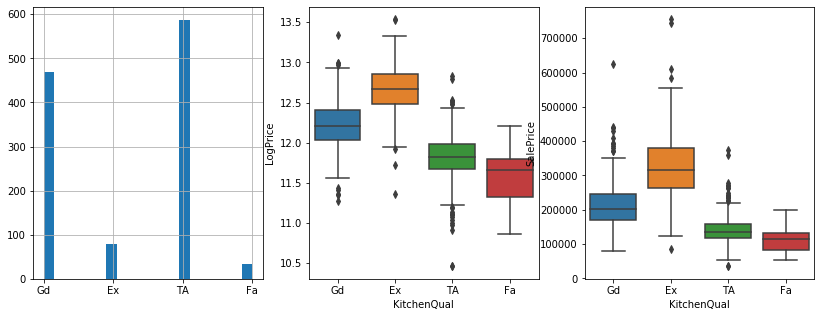

In [47]:
print(processing['KitchenQual'].isnull().sum())

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['KitchenQual'].hist(bins=20, ax=ax1)
sns.boxplot(x='KitchenQual', y='LogPrice', data=processing, ax=ax2)
sns.boxplot(x='KitchenQual', y='SalePrice', data=processing, ax=ax3)

In [48]:
print(processing['KitchenQual'].value_counts())
print(processing['KitchenQual'].value_counts()/processing['KitchenQual'].count())
processing['KitchenQual'] = processing['KitchenQual'].replace({'TA': 2, 'Gd': 3, 'Ex': 4, 'Fa': 0})
processing[['KitchenQual']]

TA    587
Gd    468
Ex     80
Fa     33
Name: KitchenQual, dtype: int64
TA    0.502568
Gd    0.400685
Ex    0.068493
Fa    0.028253
Name: KitchenQual, dtype: float64


,KitchenQual
0,3
1,3
2,3
3,3
4,4
...,...
1163,3
1164,3
1165,4
1166,2


### FireplaceQu: Fireplace quality- Nominal Var 
- Ex	Excellent - Exceptional Masonry Fireplace
- Gd	Good - Masonry Fireplace in main level
- TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa	Fair - Prefabricated Fireplace in basement
- Po	Poor - Ben Franklin Stove
- NA	No Fireplace

0
None    0.473459
Gd      0.265411
TA      0.207192
Fa      0.022260
Ex      0.019692
Po      0.011986
Name: FireplaceQu, dtype: float64


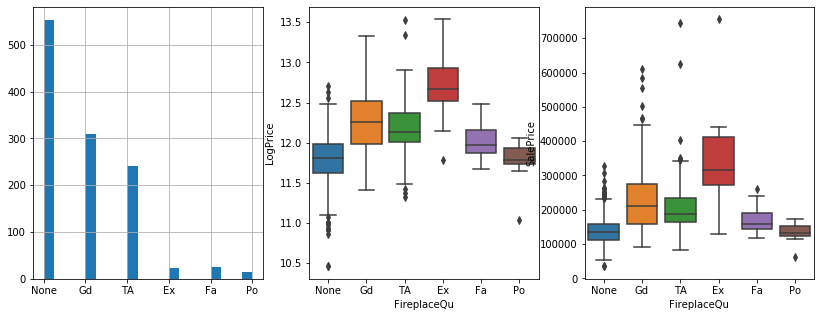

In [49]:
print(processing['FireplaceQu'].isnull().sum())
print(processing['FireplaceQu'].value_counts()/len(processing))

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['FireplaceQu'].hist(bins=20, ax=ax1)
sns.boxplot(x='FireplaceQu', y='LogPrice', data=processing, ax=ax2)
sns.boxplot(x='FireplaceQu', y='SalePrice', data=processing, ax=ax3)

In [96]:
processing['FireplaceQu'].value_counts()
processing['FireplaceQu'] = processing['FireplaceQu'].replace({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

0    553
4    310
3    242
2     26
5     23
1     14
Name: FireplaceQu, dtype: int64

### Functional: Home functionality (Assume typical unless deductions are warranted)
- either drop this var (no variance) or make it a dummy

0
Typ     0.932363
Min2    0.023973
Min1    0.022260
Maj1    0.009418
Mod     0.007705
Maj2    0.003425
Sev     0.000856
Name: Functional, dtype: float64


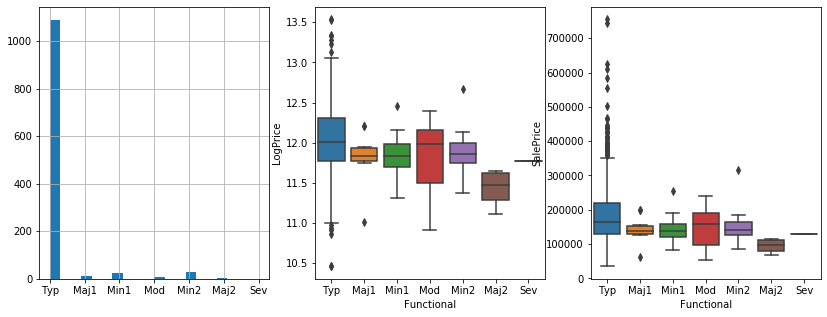

In [51]:
print(processing['Functional'].isnull().sum())
print(processing['Functional'].value_counts()/len(processing))

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['Functional'].hist(bins=20, ax=ax1)
sns.boxplot(x='Functional', y='LogPrice', data=processing, ax=ax2)
sns.boxplot(x='Functional', y='SalePrice', data=processing, ax=ax3)

In [52]:
processing['Functional'].value_counts()

Typ     1089
Min2      28
Min1      26
Maj1      11
Mod        9
Maj2       4
Sev        1
Name: Functional, dtype: int64

Typ      0.932363
Other    0.067637
Name: Functional, dtype: float64


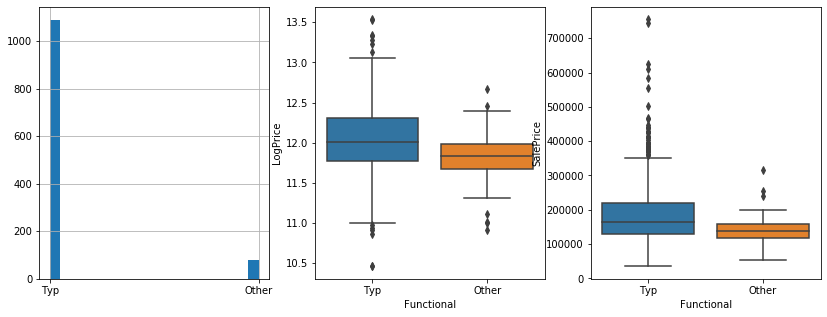

In [53]:
processing['Functional'].unique()
# processing['Functional'].replace(['Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'])
processing['Functional'] = np.where(processing['Functional']!= 'Typ','Other',processing['Functional'])
processing['Functional']
print(processing['Functional'].value_counts()/len(processing))

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])

processing['Functional'].hist(bins=20, ax=ax1)
sns.boxplot(x='Functional', y='LogPrice', data=processing, ax=ax2)
sns.boxplot(x='Functional', y='SalePrice', data=processing, ax=ax3)

In [54]:
drop_col = processing['Functional'].value_counts().index[0] # the most frequenct col
drop_col

Functional_ohe = OneHotEncoder(categories = 'auto', drop = [drop_col], sparse = False, handle_unknown='error')
Functional_enc = Functional_ohe.fit(processing[['Functional']])
Functional_enc = Functional_enc.transform(processing[['Functional']])
# print(Functional_enc)
Functional_enc = pd.DataFrame(Functional_enc, columns=Functional_ohe.get_feature_names(['Functional']))
# print(Functional_enc)
processing = pd.concat((processing.drop(['Functional'], axis=1).reset_index(drop = True), Functional_enc), axis = 1)
processing
# Functional_enc.transform( pd.DataFrame(Xtest[['RAD']].iloc[0,:] )) # for test

,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,Fireplaces,FireplaceQu,SalePrice,LogPrice,GrLivArea_tranform,CombinedBath_AbvGr,CombinedBath_Bsmt,CentralAir_N,Electrical_Other,Functional_Other
0,GasA,Ex,1296,0,0,1296,1,0,2,0,...,0,None,220000,12.301383,-0.428561,2,1,0.0,0.0,0.0
1,GasA,Ex,1079,840,0,1919,0,0,2,1,...,1,Gd,233230,12.359780,0.758017,3,0,0.0,0.0,0.0
2,GasA,Ex,1060,0,0,1060,1,0,1,0,...,1,TA,154000,11.944708,-0.878051,1,1,0.0,0.0,0.0
3,GasA,Gd,1200,0,0,1200,1,0,1,1,...,0,None,146000,11.891362,-0.611404,2,1,0.0,0.0,0.0
4,GasA,Ex,1659,0,0,1659,1,0,2,0,...,1,Ex,278000,12.535376,0.262816,2,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,GasA,Ex,728,728,0,1456,1,0,2,1,...,1,Gd,189000,12.149502,-0.123821,3,1,0.0,0.0,0.0
1164,GasA,Gd,1842,0,0,1842,2,0,0,1,...,1,Gd,385000,12.860999,0.611362,1,2,0.0,0.0,0.0
1165,GasA,Ex,1869,0,0,1869,0,0,2,0,...,1,Gd,318061,12.669998,0.662786,2,0,0.0,0.0,0.0
1166,GasA,Gd,682,548,0,1230,0,0,1,1,...,0,None,110000,11.608236,-0.554265,2,0,0.0,0.0,0.0


### Finalized processing
1. drop 1st, 2nd fl SF
2. drop low quality finished SF